In [8]:
'''                                  ReadMe                                                      '''
'''# Nessa célula vamos apenas mudar a função geradora do estado a ser preparado                 '''
'''# Basta alterar a função que gera o estado, nesse caso target_op = init_state_ref(n_qubits, p)'''

from src.vqa_tools import general_vqacircuit_penny 
from src.state_initializer import  init_state_ref,init_state_bpf
from src.generalize import *
from torch import tensor
import numpy as np
import cmath
def state_amplitude_damping(theta, phi, p):
    state = np.zeros(4,dtype=complex)    
    state[0] = np.cos(theta/2)
    state[1] = np.sqrt(1-p)*cmath.exp(1j*phi)*np.sin(theta/2)
    state[2] = np.sqrt(p)
    target_op = np.outer(state.conj(), state)
    target_op = tensor(target_op)
    return target_op


def run_calcs(list_p, epochs):
    coerencias_R = []
    coerencias_L = []
    for p in list_p:

        n_qubits, params, depht, n = start_things(2, 3)

        circuit, _ = general_vqacircuit_penny(n_qubits, depht)

        #_, target_op = init_state_ref(n_qubits, p)
        #_, target_op = init_state_bpf(n_qubits, p)
        target_op = state_amplitude_damping(np.pi/2, 0, p)

        qc, qr, params = optmize(epochs, n_qubits, circuit, params, target_op)

        rho = tomograph(qc, qr)
        print(rho)
        coerencias_L, coerencias_R = results(rho, coerencias_R, coerencias_L)

    plots(list_p, coerencias_R, coerencias_L)
    

# Results


/home/v/Desktop/Runtime-qiskit/src/generalize.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  parametros = tensor(best_params).detach().numpy()


[[ 5.60119717e-01+0.00000000e+00j  8.24368626e-03-8.87596181e-05j
   4.93330120e-01-8.75215078e-03j -1.98881595e-02-1.05913618e-02j]
 [ 8.24368626e-03+8.87596181e-05j  8.57468596e-04+0.00000000e+00j
   7.40259396e-03-1.46674803e-03j  4.16940769e-04+1.89920465e-05j]
 [ 4.93330120e-01+8.75215078e-03j  7.40259396e-03+1.46674803e-03j
   4.37392427e-01+0.00000000e+00j -1.75585018e-02-8.24326315e-03j]
 [-1.98881595e-02+1.05913618e-02j  4.16940769e-04-1.89920465e-05j
  -1.75585018e-02+8.24326315e-03j  1.63038720e-03+0.00000000e+00j]]
[[ 0.39414334+0.j          0.29507318+0.14626768j  0.25981644+0.24816622j
  -0.01116013-0.01348144j]
 [ 0.29507318-0.14626768j  0.27622303+0.j          0.28757203+0.08978164j
  -0.01388187-0.00588051j]
 [ 0.25981644-0.24816622j  0.28757203-0.08978164j  0.32858723+0.j
  -0.016305  -0.0015862j ]
 [-0.01116013+0.01348144j -0.01388187+0.00588051j -0.016305  +0.0015862j
   0.00104641+0.j        ]]
[[ 0.30922426+0.j          0.32406337-0.22158656j  0.10645779-0.1539165

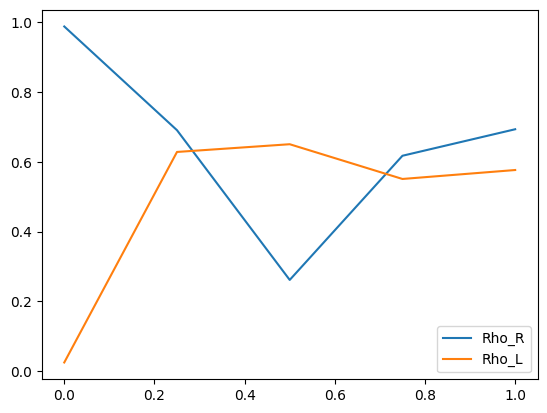

In [9]:
#list_p = [0,0.25,0.5,0.75,1]
list_p = np.linspace(0,1,3)
print(list_p)
run_calcs(list_p, 5)

In [10]:
list_p = np.linspace(0,1,3)
print(list_p)

[0.  0.5 1. ]
